In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [86]:
data = pd.read_csv(f'C:\\Users\\Leonardo\\Desktop\\Projetos Python\\Pesquisa\\data\\Valor_residências.csv')
data['Longitude'] = data['Longitude'].apply(lambda x: float(x.replace(".","").replace(",",".")))
data['Latitude'] = data['Latitude'].apply(lambda x: float(x.replace(".","").replace(",",".")))
data['Area'] = data['Area'].replace({'m²':''}, regex=True)
data.dropna(inplace=True)
data.head(20)

,condomínio,casa,Latitude,Longitude,Area,Quartos,Vagas de estacionamento,Localização,Banheiros,Preço
0,0,1,-27.67,-48.53,175,2.0,2.0,"Rua Saul Silveira Penha, Carianos",2.0,1100000
1,0,1,-27.65,-48.48,208,3.0,2.0,"Rio Tavares, Florianópolis",4.0,2100000
2,1,0,-27.59,-48.50,117,3.0,1.0,"Rua Vereador Ramon Filomeno, Itacorubi",3.0,1100000
4,1,0,-27.58,-48.54,240,3.0,3.0,"Rua Comandante Constantino Nicolau Spyrides, B...",5.0,8500000
5,1,0,-27.61,-48.59,94,3.0,1.0,"Rua João Meirelles, Itaguaçu",2.0,750000
6,1,0,-27.60,-48.60,71,2.0,2.0,"Capoeiras, Florianópolis",2.0,550000
7,0,1,-27.44,-48.41,99,3.0,1.0,"Rodovia Armando Calil Bulos, Ingleses do Rio V...",2.0,370000
8,1,0,-27.60,-48.59,98,4.0,1.0,"Rua São Cristóvão, Capoeiras",2.0,375000
9,1,0,-27.57,-48.54,93,2.0,2.0,"Boulevard Paulo Zimmer, Agronômica",3.0,1850000
10,1,0,-27.46,-48.40,322,4.0,4.0,"Rua Dário Manoel Cardoso, Ingleses do Rio Verm...",5.0,2500000


<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

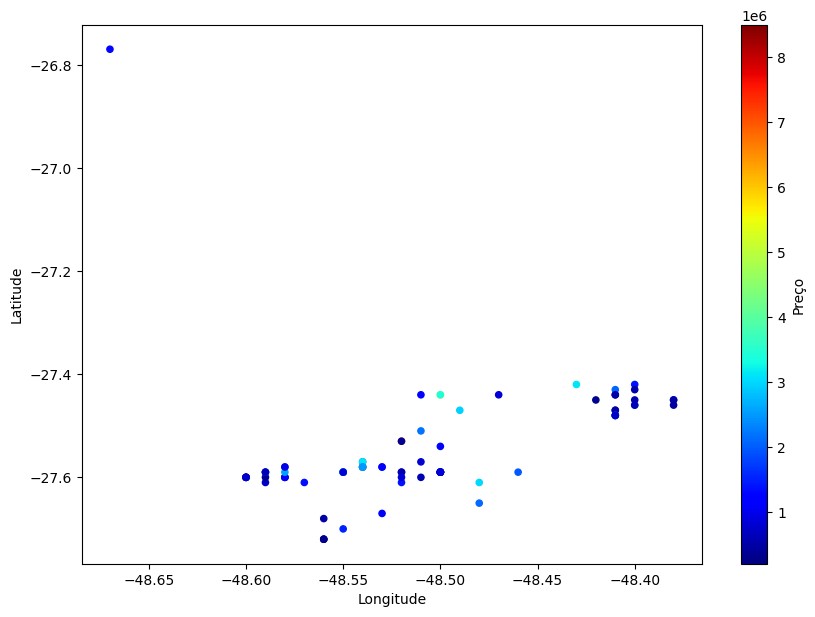

In [85]:
data.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,7),c="Preço", cmap=plt.get_cmap("jet"), colorbar=True)


In [75]:
x = data.drop(['Preço', 'Localização'], axis = 1)
y = data['Preço']

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [44]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [83]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
lr_mse = mean_squared_error(y_test,y_pred)
lr_rse = np.sqrt(lr_mse)
scores = cross_val_score(lr, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
lr_rmse_scores = np.sqrt(-scores)
display_scores(lr_rmse_scores)

#Por hora o RandomForestRegressor está desempenhando melhor, porém a previsão está muito falha devido ao underffiting por falta de dados.

Scores: [ 830165.77888943  829056.34499348  622824.76512083 2281810.52507164
  792942.28464238  570272.53529184  587028.35945459  957745.93428014
  295774.47484281  613015.33679564]
Mean: 838063.633938276
Standard deviation: 512512.5561897587


In [78]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)
ytree_pred = tree_reg.predict(x_test)
tree_mse = mean_squared_error(y_test, ytree_pred)
tree_rse = np.sqrt(tree_mse)
print(f'Relative Standard Error: {tree_rse}')
scores = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Relative Standard Error: 1664681.617548216
Scores: [ 854509.80099704  880967.77378428 1746037.0230079  2159220.7919922
  798776.50776681  416721.50388496 2050421.40625148  823580.83153472
  428785.29981021  457615.85777884]
Mean: 1061663.6796808448
Standard deviation: 635087.1123135338


In [84]:
forest = RandomForestRegressor()
forest.fit(x_train,y_train)
forest_scores = cross_val_score(forest, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

 

Scores: [ 916849.10591063  714406.52192144  771525.2056495  2223639.16948673
  521951.69127007  513093.6474929  1036727.20095588  924592.97907062
  288417.39893412  463095.18169056]
Mean: 837429.8102382445
Standard deviation: 513900.79377475096
